# 数据分析

In [353]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels import PanelOLS

## 读取数据

In [354]:
# 读取数据
df = pd.read_excel("./final_data.xls")
# 查看数据概况
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10795 entries, 0 to 10794
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Stk_cd  10795 non-null  int64  
 1   CSR     10795 non-null  float64
 2   YEAR    10795 non-null  int64  
 3   TOP10   10795 non-null  float64
 4   BP      10795 non-null  float64
 5   TOBINQ  10795 non-null  float64
 6   LEV     10795 non-null  float64
 7   SIZE    10795 non-null  float64
 8   SOE     10795 non-null  float64
 9   IND     10795 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 843.5 KB


In [355]:
from scipy.stats.mstats import winsorize

df['BP'] = winsorize(df['BP'], limits=[0.01, 0.01])
print(df)

       Stk_cd    CSR  YEAR  TOP10        BP    TOBINQ       LEV       SIZE  \
0           2  76.52  2016  57.40  0.175352  1.069010  0.805367  27.445504   
1           8  21.29  2016  40.42  0.085953  2.299946  0.246583  22.826504   
2          10  15.97  2016  44.33  0.017621  1.419832  0.544721  22.302922   
3          11  38.97  2016  66.55  0.147164  1.421490  0.637636  22.618538   
4          12  72.45  2016  32.13  0.098931  1.631295  0.525907  23.565078   
...       ...    ...   ...    ...       ...       ...       ...        ...   
10790  603989  25.51  2020  74.30  0.142083  2.821724  0.379898  22.193237   
10791  603993  19.34  2020  79.28  0.052364  1.585558  0.613408  25.530897   
10792  603997   7.29  2020  85.63 -0.074551  1.138218  0.736398  23.575464   
10793  603998  27.31  2020  51.93  0.042487  1.582559  0.435642  21.530982   
10794  603999  16.20  2020  64.62  0.042065  1.654336  0.166607  21.482746   

            SOE  IND  
0      0.000000    0  
1      0.010889  

In [356]:
# 创建虚拟变量（年份）
year_dummies = pd.get_dummies(df['YEAR'], prefix='YEAR', drop_first=True)
# 合并虚拟变量到原始数据
data_with_dummies = pd.concat([df, year_dummies], axis=1)
# 设置双重索引
data_with_dummies = data_with_dummies.set_index(["Stk_cd", "YEAR"])

In [357]:
print(data_with_dummies)

               CSR  TOP10        BP    TOBINQ       LEV       SIZE       SOE  \
Stk_cd YEAR                                                                    
2      2016  76.52  57.40  0.175352  1.069010  0.805367  27.445504  0.000000   
8      2016  21.29  40.42  0.085953  2.299946  0.246583  22.826504  0.010889   
10     2016  15.97  44.33  0.017621  1.419832  0.544721  22.302922  0.018431   
11     2016  38.97  66.55  0.147164  1.421490  0.637636  22.618538  0.588242   
12     2016  72.45  32.13  0.098931  1.631295  0.525907  23.565078  0.000000   
...            ...    ...       ...       ...       ...        ...       ...   
603989 2020  25.51  74.30  0.142083  2.821724  0.379898  22.193237  0.000000   
603993 2020  19.34  79.28  0.052364  1.585558  0.613408  25.530897  0.000000   
603997 2020   7.29  85.63 -0.074551  1.138218  0.736398  23.575464  0.000000   
603998 2020  27.31  51.93  0.042487  1.582559  0.435642  21.530982  0.000000   
603999 2020  16.20  64.62  0.042065  1.6

## 描述性分析和相关性分析

In [358]:
df = df.set_index(["Stk_cd", "YEAR"])
# 描述性分析
print(df.describe())
# 相关性分析
print(df.corr())
# # 绘制相关性热图
# import seaborn as sns
# sns.heatmap(df.corr(), annot=True, cmap="Blues")
# # 描述性分析
# print(data_with_dummies.describe())
# # 相关性分析
# print(data_with_dummies.corr())
# # 绘制相关性热图
# import seaborn as sns
#
# sns.heatmap(data_with_dummies.corr(), annot=True, cmap="Blues")

                CSR         TOP10            BP        TOBINQ           LEV  \
count  10795.000000  10795.000000  10795.000000  10795.000000  10795.000000   
mean      21.034719     57.030764      0.049697      2.007117      0.432658   
std       12.232101     14.610519      0.142087      1.887513      0.197734   
min      -18.450000     14.590000     -0.819441      0.673522      0.008359   
25%       15.220000     46.490000      0.025854      1.170746      0.278299   
50%       20.950000     57.100000      0.062828      1.555917      0.426855   
75%       26.160000     67.365000      0.108193      2.231669      0.578399   
max       87.020000    100.970000      0.314425     78.751176      0.994273   

               SIZE           SOE           IND  
count  10795.000000  10795.000000  10795.000000  
mean      22.540144      0.025238      0.637054  
std        1.331718      0.093531      0.480872  
min       17.654202      0.000000      0.000000  
25%       21.641957      0.000000     

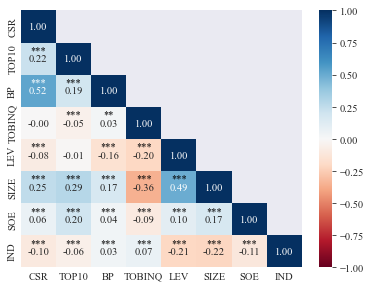

In [359]:
# here put the import lib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import matplotlib as mpl


def cm2inch(x, y):
    return x / 2.54, y / 2.54


size1 = 10.5
mpl.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
        "font.family": 'serif',
        "font.size": size1,
        "font.serif": ['Times New Roman'],
    }
)
fontdict = {'weight': 'bold', 'size': size1, 'family': 'SimHei'}

df_coor = df.corr()
fig = plt.figure(figsize=(cm2inch(16, 12)))
ax1 = plt.gca()

#构造mask，去除重复数据显示
mask = np.zeros_like(df_coor)
mask[np.triu_indices_from(mask)] = True
mask2 = mask
mask = (np.flipud(mask) - 1) * (-1)
mask = np.rot90(mask, k=-1)

im1 = sns.heatmap(df_coor, annot=True, cmap="RdBu"
                  , mask=mask  #构造mask，去除重复数据显示
                  , vmax=1, vmin=-1
                  , fmt='.2f', ax=ax1)

ax1.tick_params(axis='both', length=0)

#计算相关性显著性并显示
rlist = []
plist = []
for i in df.columns.values:
    for j in df.columns.values:
        r, p = pearsonr(df[i], df[j])
        rlist.append(r)
        plist.append(p)

rarr = np.asarray(rlist).reshape(len(df.columns.values), len(df.columns.values))
parr = np.asarray(plist).reshape(len(df.columns.values), len(df.columns.values))
xlist = ax1.get_xticks()
ylist = ax1.get_yticks()

widthx = 0
widthy = -0.15

for m in ax1.get_xticks():
    for n in ax1.get_yticks():
        pv = (parr[int(m), int(n)])
        rv = (rarr[int(m), int(n)])
        if mask2[int(m), int(n)] < 1.:
            if abs(rv) > 0.5:
                if pv < 0.05 and pv >= 0.01:
                    ax1.text(n + widthx, m + widthy, '*', ha='center', color='white')
                if pv < 0.01 and pv >= 0.001:
                    ax1.text(n + widthx, m + widthy, '**', ha='center', color='white')
                if pv < 0.001:
                    # print([int(m),int(n)])
                    ax1.text(n + widthx, m + widthy, '***', ha='center', color='white')
            else:
                if pv < 0.05 and pv >= 0.01:
                    ax1.text(n + widthx, m + widthy, '*', ha='center', color='k')
                elif pv < 0.01 and pv >= 0.001:
                    ax1.text(n + widthx, m + widthy, '**', ha='center', color='k')
                elif pv < 0.001:
                    ax1.text(n + widthx, m + widthy, '***', ha='center', color='k')
plt.savefig(r'D:\学期\大三春\计量经济学\大作业\成品\fig\r_demo.png', dpi=600)
plt.show()

## 固定效应模型

In [360]:
# 建立固定效应模型
model_fe = PanelOLS(data_with_dummies['BP'],
                    data_with_dummies[
                        ['CSR', 'SIZE', 'LEV', 'TOBINQ', 'TOP10', 'SOE', 'IND', 'YEAR_2017', 'YEAR_2018',
                         'YEAR_2019', 'YEAR_2020']],
                    entity_effects=True)  # 使用entity_effects参数启用固定效应
# 拟合模型
results_fe = model_fe.fit()
# 查看回归结果
results_fe.summary

Dep. Variable:,BP,R-squared:,0.2709
Estimator:,PanelOLS,R-squared (Between):,-475.30
No. Observations:,10795,R-squared (Within):,0.2709
Date:,"Sun, May 21 2023",R-squared (Overall):,-217.73
Time:,10:04:50,Log-likelihood,1.014e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,291.39
Entities:,2159,P-value,0.0000
Avg Obs:,5.0000,Distribution:,"F(11,8625)"
Min Obs:,5.0000,,
Max Obs:,5.0000,F-statistic (robust):,291.39


## 随机效应模型

In [361]:
from linearmodels import RandomEffects

# 建立随机效应模型
model_re = RandomEffects(data_with_dummies['BP'],
                         data_with_dummies[
                             ['CSR', 'SIZE', 'LEV', 'TOBINQ', 'TOP10', 'SOE', 'IND', 'YEAR_2017', 'YEAR_2018',
                              'YEAR_2019',
                              'YEAR_2020']])
# 拟合模型
results_re = model_re.fit()
# 查看回归结果
results_re.summary

Dep. Variable:,BP,R-squared:,0.3278
Estimator:,RandomEffects,R-squared (Between):,0.5864
No. Observations:,10795,R-squared (Within):,0.2002
Date:,"Sun, May 21 2023",R-squared (Overall):,0.3772
Time:,10:04:50,Log-likelihood,8413.2
Cov. Estimator:,Unadjusted,,
,,F-statistic:,478.18
Entities:,2159,P-value,0.0000
Avg Obs:,5.0000,Distribution:,"F(11,10784)"
Min Obs:,5.0000,,
Max Obs:,5.0000,F-statistic (robust):,478.18


## 稳健性检验

In [362]:
# robust_fe_results = model_fe.fit(cov_type='robust')
# print(robust_fe_results)

## B-P 检验

In [363]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.formula.api as smf

# 读取回归模型的残差和预测值读取回归模型的残差和预测值
results_ols = smf.ols('BP ~ CSR + SIZE + LEV + SOE + IND + YEAR_2017 + YEAR_2018 + YEAR_2019 + YEAR_2020',
                      data=data_with_dummies).fit()
residuals = results_ols.resid
# residuals = results_re.resids

# 获取预测值
predicted_values = results_ols.predict()
# predicted_values = results_re.predict()

# 进行B-P检验
bp_test = het_breuschpagan(residuals, sm.add_constant(predicted_values))

# 输出B-P检验结果
print("BP Test Statistic:", bp_test[0])
print("BP p-value:", bp_test[1])
print("BP Test Results:", bp_test[2:])

BP Test Statistic: 640.9408494533446
BP p-value: 2.0860227836534878e-141
BP Test Results: (681.2718426775682, 1.1040659793282478e-145)


In [364]:
print(results_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                     BP   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     558.5
Date:                Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                        10:04:50   Log-Likelihood:                 7812.4
No. Observations:               10795   AIC:                        -1.560e+04
Df Residuals:                   10785   BIC:                        -1.553e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3769      0.022    -17.118      0.0

## 进行Hausman检验

In [365]:
# Hausman检验
from linearmodels.panel import compare

comparison = compare({'FE': results_fe, 'RE': results_re})
print(comparison.summary)

                    Model Comparison                    
                                    FE                RE
--------------------------------------------------------
Dep. Variable                       BP                BP
Estimator                     PanelOLS     RandomEffects
No. Observations                 10795             10795
Cov. Est.                   Unadjusted        Unadjusted
R-squared                       0.2709            0.3278
R-Squared (Within)              0.2709            0.2002
R-Squared (Between)            -475.30            0.5864
R-Squared (Overall)            -217.73            0.3772
F-statistic                     291.39            478.18
P-value (F-stat)                0.0000            0.0000
=====================     ============   ===============
CSR                             0.0046            0.0058
                              (37.198)          (54.551)
SIZE                            0.1026           -0.0045
                              (

In [366]:
# 1. 运用计量书本上的公式，自编函数， 因为目前 Python 里面没有现成的模块
import numpy.linalg as la
from scipy import stats


def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B))

    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval


# 2. 将fe,re结果带入自编函数之中。
hausman_results = hausman(results_fe, results_re)
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))

# 3. 看结果，如果这儿的 p-Value 小于 10%，则支持 固定效应 模型。

chi-Squared: 1093.4396325562604
degrees of freedom: 11
p-Value: 1.469834218780241e-227


In [367]:
b_fe = results_fe.params
b_re = results_re.params
b_diff = b_fe - b_re
v_fe = results_fe.cov
v_re = results_re.cov
v_diff = v_fe - v_re
df = len(b_fe)

table = pd.DataFrame({'FE': b_fe, 'RE': b_re, 'Difference': b_diff, 'sqrt(diag(v_fe-v_re))': np.sqrt(np.diag(v_diff))})
chi2 = np.dot(b_diff.T, np.linalg.inv(v_diff).dot(b_diff))
pval = 1 - stats.chi2.cdf(chi2, df)

print(table)
print()
print(f'chi-Squared: {chi2:.2f}')
print(f'degrees of freedom: {df}')
print(f'p-Value:{pval:.5f}')

                 FE        RE  Difference  sqrt(diag(v_fe-v_re))
CSR        0.004596  0.005833   -0.001237               0.000062
SIZE       0.102636 -0.004548    0.107184               0.004990
LEV       -0.482289 -0.099648   -0.382641               0.014780
TOBINQ     0.002987 -0.000366    0.003353               0.000710
TOP10      0.000538  0.000692   -0.000155               0.000238
SOE       -0.073454  0.013417   -0.086870               0.012525
IND        0.040238  0.011656    0.028583               0.011334
YEAR_2017  0.032624  0.048540   -0.015916                    NaN
YEAR_2018  0.009515  0.028723   -0.019209               0.000946
YEAR_2019  0.003921  0.029303   -0.025382               0.001312
YEAR_2020 -0.002594  0.029996   -0.032590               0.001878

chi-Squared: 1093.44
degrees of freedom: 11
p-Value:0.00000


C:\Users\HP\AppData\Local\Temp\ipykernel_27592\295053973.py:9: RuntimeWarning: invalid value encountered in sqrt
  table = pd.DataFrame({'FE': b_fe, 'RE': b_re, 'Difference': b_diff, 'sqrt(diag(v_fe-v_re))': np.sqrt(np.diag(v_diff))})
